# PU learning techniques applied to artificial data

## "Blobs" data set

In [61]:
!pip install --user pulearn

In [25]:
import pandas as pd                    # for data handling
import numpy as np                     # for random selections, mainly
import matplotlib.pyplot as plt        # for plotting
%matplotlib inline                  
plt.rcParams['figure.figsize'] = 7,7   # graph dimensions
plt.rcParams['font.size'] = 14         # graph font size

In [36]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100000, 
    n_features=5,
    random_state=42,
)

In [ ]:
# Create the data set
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples = 100000, 
    centers = [[1,5], [5,1], [0,0], [6,6], [4,12], [-2,10], [2,8]],
    random_state=42,
#     n_features=4
)
y = (y > 1).astype(int)  # Convert the original labels [0,1,2,3] to [0,1]

In [38]:
# helper function to create feature column names depending on the number of features generated
feat_lst = []

def featGen(X):
    for ct in range(len(X[0])):
        feat_lst.append(f'feature_{ct + 1}')
        
    return feat_lst

In [39]:
X = pd.DataFrame(X, columns = featGen(X))
y = pd.Series(y)

# display feature columns and true labels
print(display(X))
print(display(y))
print(f'\nUnique classes: {y.unique()}')

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.199001,0.038815,0.537428,2.065437,0.322309
1,-0.174511,-0.891609,-1.642978,-2.321968,-1.414731
2,-1.490869,-1.051332,1.804579,1.524521,1.664217
3,1.698004,0.637404,-1.360634,-0.799569,-1.292437
4,0.525288,0.532350,1.281861,2.048865,1.078264
...,...,...,...,...,...
99995,1.258465,-1.388372,-1.463957,-1.206884,-1.353302
99996,1.056888,0.831194,0.953040,1.929557,0.757973
99997,-1.061505,0.441811,0.531676,0.069780,0.531127
99998,0.401609,1.771627,-1.689198,-2.033041,-1.492632


None


0        1
1        0
2        1
3        0
4        1
        ..
99995    0
99996    1
99997    1
99998    0
99999    0
Length: 100000, dtype: int32

None

Unique classes: [1 0]


In [40]:
# Check the contents of the set
print('%d data points and %d features\n' % (X.shape))
print(pd.Series(y).value_counts())

100000 data points and 5 features

0    50014
1    49986
dtype: int64


In [41]:
df = pd.DataFrame()
df = pd.concat([X])
df['target'] = y
df

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,2.199001,0.038815,0.537428,2.065437,0.322309,1
1,-0.174511,-0.891609,-1.642978,-2.321968,-1.414731,0
2,-1.490869,-1.051332,1.804579,1.524521,1.664217,1
3,1.698004,0.637404,-1.360634,-0.799569,-1.292437,0
4,0.525288,0.532350,1.281861,2.048865,1.078264,1
...,...,...,...,...,...,...
99995,1.258465,-1.388372,-1.463957,-1.206884,-1.353302,0
99996,1.056888,0.831194,0.953040,1.929557,0.757973,1
99997,-1.061505,0.441811,0.531676,0.069780,0.531127,1
99998,0.401609,1.771627,-1.689198,-2.033041,-1.492632,0


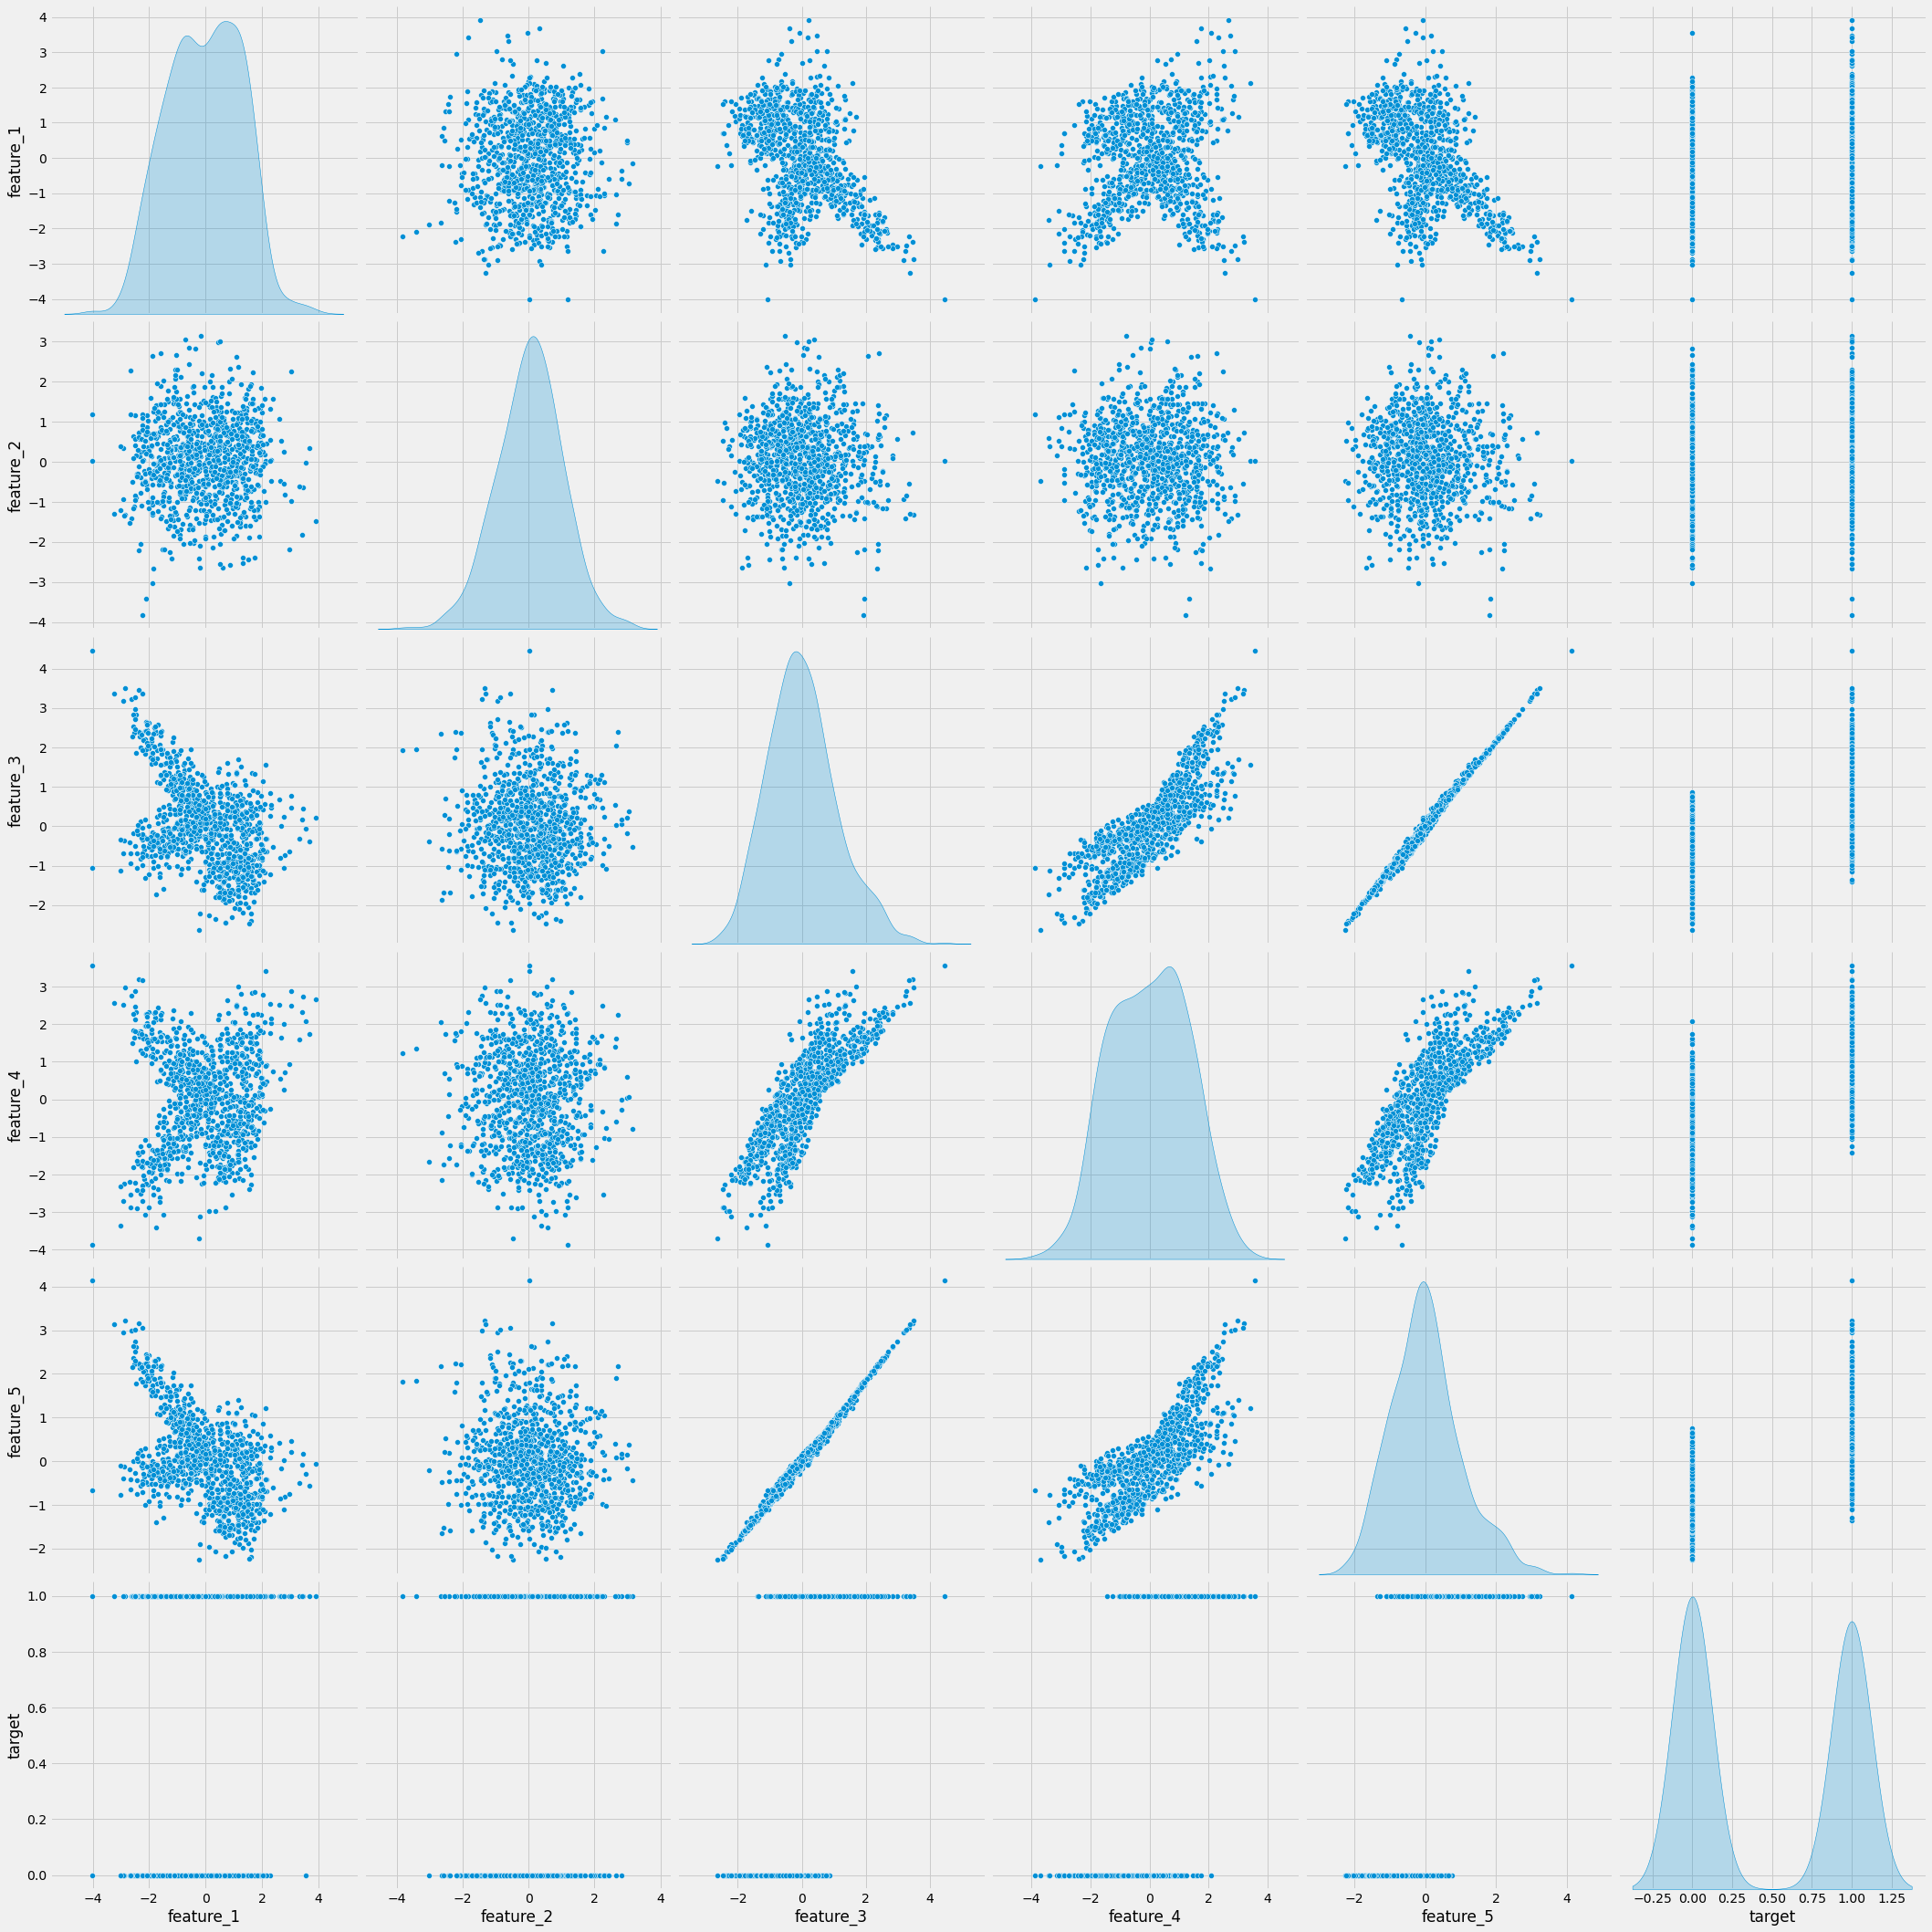

In [44]:
import seaborn as sns

plt.style.use('fivethirtyeight')

sns.pairplot(df.sample(1000), height=5, diag_kind='kde')
plt.show()

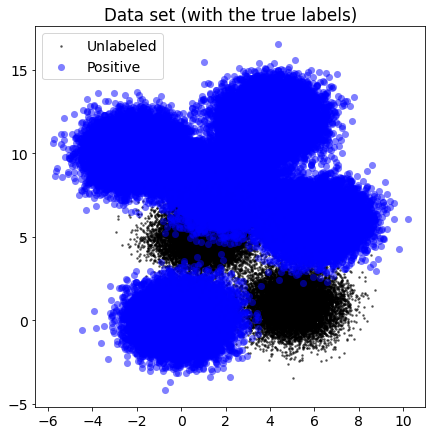

In [156]:
# plot unlabeled data 
plt.scatter(
    X[y==0].feature_1, X[y==0].feature_2, 
    c='k', marker='.', linewidth=1, s=10, alpha=0.5, 
    label='Unlabeled'
)
# plt.scatter(
#     X[y==0].feature_3, X[y==0].feature_4, 
#     c='k', marker='.', linewidth=1, s=10, alpha=0.5, 
# )

# plot positive data 
plt.scatter(
    X[y==1].feature_1, X[y==1].feature_2, 
    c='b', marker='o', linewidth=0, s=50, alpha=0.5, 
    label='Positive'
)
# plt.scatter(
#     X[y==1].feature_3, X[y==1].feature_4, 
#     c='b', marker='o', linewidth=0, s=50, alpha=0.5, 
# )
plt.legend()
plt.title('Data set (with the true labels)')
plt.show()

In [157]:
print(f'Number of positive samples: {sum(y==1)}')
print(f'Number of unlabeled samples: {sum(y==0)}')

Number of positive samples: 71428
Number of unlabeled samples: 28572


In [158]:
# Back up the true labels
y_orig = y.copy()

# Unlabel 95% of positive samples
hidden_size = int(sum(y) * 0.95)

y.loc[
    # use the 'choice' method to randomly select rows 
    np.random.choice(
        y[y==1].index,   # since 'y' is a series object, indexing is used to get the indexes of rows where 'y==1'
        replace=False,   # value of 'y[y==1].index' can't be selected multiple times
        size=hidden_size # output shape
    )
] = 0 # unlabel 'hidden_size' number of positive samples

In [159]:
# Check the new contents of the set
print('%d positive out of %d total' % (sum(y), len(y)))

3572 positive out of 100000 total


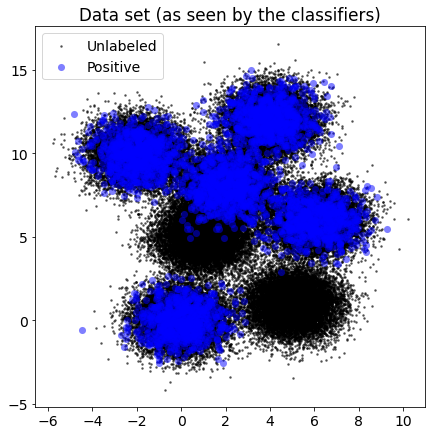

In [160]:
# plot unlabeled data 
plt.scatter(
    X[y==0].feature_1, X[y==0].feature_2, 
    c='k', marker='.', linewidth=1, s=10, alpha=0.5, 
    label='Unlabeled'
)
# plt.scatter(
#     X[y==0].feature3, X[y==0].feature4, 
#     c='k', marker='.', linewidth=1, s=10, alpha=0.5, 
# )

# plot positive data 
plt.scatter(
    X[y==1].feature_1, X[y==1].feature_2, 
    c='b', marker='o', linewidth=0, s=50, alpha=0.5, 
    label='Positive'
)
# plt.scatter(
#     X[y==1].feature3, X[y==1].feature4, 
#     c='b', marker='o', linewidth=0, s=50, alpha=0.5, 
# )

plt.legend()
plt.title('Data set (as seen by the classifiers)')
plt.show()

## Standard classifier

In [161]:
# We'll use a generic random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators = 1000,  # Use 1000 trees
    n_jobs = -1,          # Use all CPU cores
    random_state = 42
)
rf.fit(X, y)

# Store the scores assigned by this approach
results = pd.DataFrame({
    'truth'      : y_orig,   # The true labels
    'label'      : y,        # The labels to be shown to models in experiment
    'output_std' : rf.predict_proba(X)[:,1]   # The random forest's scores
#     'output_std' : rf.predict(X)   # The random forest's scores
}, columns = ['truth', 'label', 'output_std'])

In [ ]:
rf.classes_

In [162]:
rf.predict_proba(X)

array([[0.964, 0.036],
       [0.934, 0.066],
       [0.992, 0.008],
       ...,
       [0.976, 0.024],
       [0.998, 0.002],
       [0.994, 0.006]])

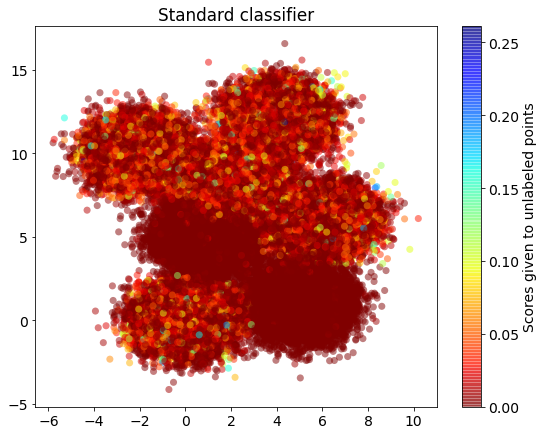

In [163]:
# Visualize this approach's results
plt.rcParams['figure.figsize'] = 9,7
plt.scatter(
    X[y==0].feature_1, X[y==0].feature_2, 
    c = results[y==0].output_std, linewidth = 0, s = 50, alpha = 0.5, 
    cmap = 'jet_r'          
)

# plt.scatter(
#     X[y==0].feature3, X[y==0].feature4, 
#     c = results[y==0].output_std, linewidth = 0, s = 50, alpha = 0.5, 
#     cmap = 'jet_r'          
# )
plt.colorbar(label='Scores given to unlabeled points')
plt.title('Standard classifier')
plt.show()

### Using `ElkanotoPuClassifier`

In [171]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from pulearn import ElkanotoPuClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC

# init estimator
estimator = SVC(
#     kernel='linear' # defaults to 'rbf' kernel
    gamma
    probability=True,
    cache_size=1000,
    random_state=42
)

ec = ElkanotoPuClassifier(
    estimator,
    hold_out_ratio=0.2
)

# inputs to the fit function have to be Numpy-vectorized
ec.fit(X.values, y.values)
# ec.fit(X, y)

ElkanotoPuClassifier(estimator=SVC(cache_size=1000, probability=True,
                                   random_state=42),
                     hold_out_ratio=0.2)

### Extract only the 2nd column to get the predicted class probabilities on whether or not the input sample is unlabeled

In [172]:
results['output_ec'] = ec.predict_proba(X.values)

In [173]:
results

,truth,label,output_std,output_bag,output_ec
0,1,0,0.036,0.651674,1.208317
1,1,0,0.066,0.838205,0.915959
2,1,0,0.008,0.723849,1.178931
3,0,0,0.000,0.021990,0.925382
4,0,0,0.000,0.000000,1.124384
...,...,...,...,...,...
99995,1,0,0.025,0.641316,1.330525
99996,1,0,0.000,0.294912,0.971398
99997,1,0,0.024,0.790625,0.988722
99998,0,0,0.002,0.000000,0.946948


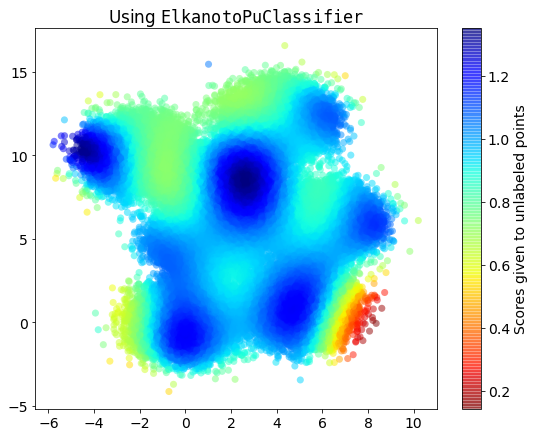

In [174]:
# Visualize this approach's results
plt.scatter(
    X[y==0].feature_1, X[y==0].feature_2, 
    c = results[y==0].output_ec, linewidth = 0, s = 50, alpha = 0.5, 
    cmap = 'jet_r'
)

# plt.scatter(
#     X[y==0].feature3, X[y==0].feature4, 
#     c = results[y==0].output_bag, linewidth = 0, s = 50, alpha = 0.5, 
#     cmap = 'jet_r'          
# )
plt.colorbar(label='Scores given to unlabeled points')
plt.title(r'Using ${\tt ElkanotoPuClassifier}$')
plt.show()

### Using `BaggingPuClassifier`

In [164]:
from pulearn import BaggingPuClassifier

bc = BaggingPuClassifier(
    n_estimators = 1000,  # 1000 trees as usual
    max_samples = sum(y), # Balance the positives and unlabeled in each bag
    n_jobs = -1,          # Use all cores
    random_state = 42
)
bc.fit(X, y)

BaggingPuClassifier(max_samples=3572, n_estimators=1000, n_jobs=-1,
                    random_state=42)

In [165]:
bc.classes_

array([0, 1])

In [166]:
bc.oob_decision_function_

array([[0.34832636, 0.65167364],
       [0.16179541, 0.83820459],
       [0.27615063, 0.72384937],
       ...,
       [0.209375  , 0.790625  ],
       [1.        , 0.        ],
       [0.41972718, 0.58027282]])

In [167]:
bc.oob_decision_function_[:,1]

array([0.65167364, 0.83820459, 0.72384937, ..., 0.790625  , 0.        ,
       0.58027282])

### Extract only the 2nd column to get the predicted class probabilities on whether or not the input sample is unlabeled

In [168]:
results['output_bag'] = bc.oob_decision_function_[:,1]
# results['output_bag'] = max_lst

In [169]:
results

,truth,label,output_std,output_bag
0,1,0,0.036,0.651674
1,1,0,0.066,0.838205
2,1,0,0.008,0.723849
3,0,0,0.000,0.021990
4,0,0,0.000,0.000000
...,...,...,...,...
99995,1,0,0.025,0.641316
99996,1,0,0.000,0.294912
99997,1,0,0.024,0.790625
99998,0,0,0.002,0.000000


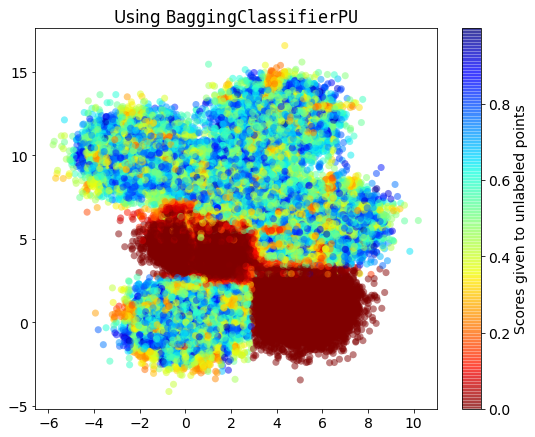

In [170]:
# Visualize this approach's results
plt.scatter(
    X[y==0].feature_1, X[y==0].feature_2, 
    c = results[y==0].output_bag, linewidth = 0, s = 50, alpha = 0.5, 
    cmap = 'jet_r'
)

# plt.scatter(
#     X[y==0].feature3, X[y==0].feature4, 
#     c = results[y==0].output_bag, linewidth = 0, s = 50, alpha = 0.5, 
#     cmap = 'jet_r'          
# )
plt.colorbar(label='Scores given to unlabeled points')
plt.title(r'Using ${\tt BaggingClassifierPU}$')
plt.show()

## Comparison of approaches

In [175]:
# For each data point, calculate the average score from the three approaches
results['output_all'] = results[[
    'output_std', 
    'output_bag', 
    'output_ec'
]].mean(axis = 1)

In [197]:
# Prepare for graphing the performance 
# (i.e. the success in identifying hidden positives)
ts = range(100, hidden_size, 100)
y_std, y_bag, y_ec, y_stp, y_all = [], [], [], [], []

'''
Get the mean of the sorted truth column values from 
the results column that has a label column value of '0'
every 100 samples.

Do this for all approaches.
'''
for t in ts:
    y_std.append(
        results[results.label == 0].sort_values(
            'output_std', ascending = False
        ).head(t).truth.mean()
    )
    y_bag.append(
        results[results.label == 0].sort_values(
            'output_bag', ascending = False
        ).head(t).truth.mean()
    )
    y_ec.append(
        results[results.label == 0].sort_values(
            'output_ec', ascending = False
        ).head(t).truth.mean()
    )

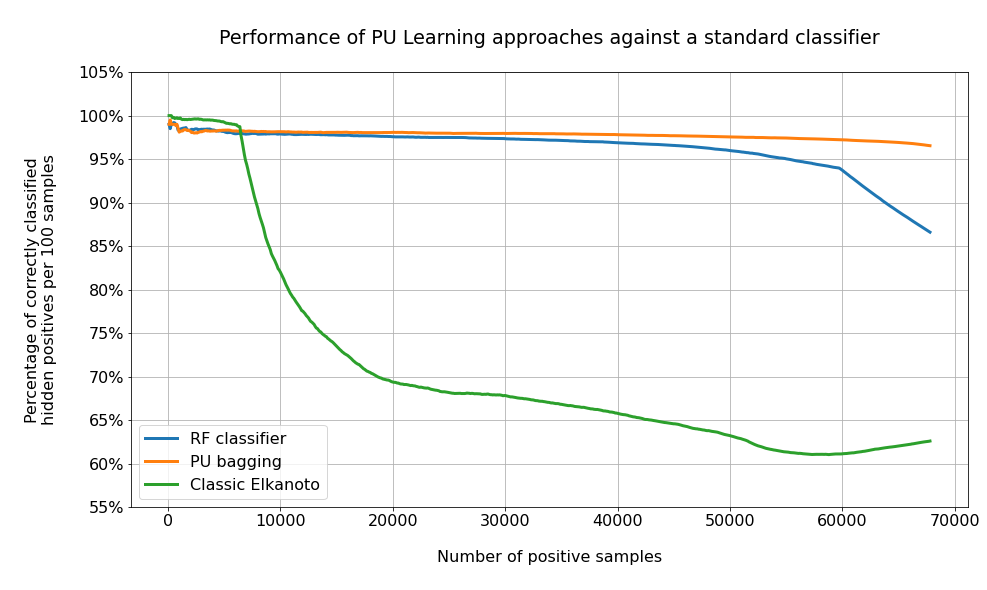

In [199]:
# Performance graphing
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 15, 8

plt.plot(
    ts, y_std,
    ts, y_bag,
    ts, y_ec,
    lw = 3
)

vals = plt.gca().get_yticks()
plt.yticks(vals, ['%.0f%%' % (v*100) for v in vals])
plt.xlabel('\nTotal number of positive samples\n')
plt.ylabel('\nPercentage of correctly classified\nhidden positives per 100 samples\n')
plt.legend([
    'RF classifier', 
    'PU bagging', 
    'Classic Elkanoto', 
    'Average score'
])
ylim = plt.gca().get_ylim()
plt.title('\nPerformance of PU Learning approaches against a standard classifier\n')
plt.grid()
plt.show()